In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from sklearn.cluster import KMeans
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import hdbscan
import seaborn as sns

In [2]:
# Reading the file with metrices
df_parking = gpd.read_file("F:/Berlin-DOP_2020/Processed images_new/parking_dist.gpkg", driver="GPKG", layer="parking_disolved_withdata", crs='EPSG:25833')

In [5]:
# Renaming the column heading
df_parking = df_parking.rename(columns={'True or False': 'True_or_False'})
df_parking.loc[df_parking.True_or_False == "true", 'True_or_False'] = 1
df_parking.loc[df_parking.True_or_False == "false", 'True_or_False'] = 0

In [6]:
df_parking

index_right  id_x              label  parking_area_m2  \
0              0    98  PK-space-occupied        30.161748   
1              1    99  PK-space-occupied        27.762756   
2              2   101  PK-space-occupied        45.705855   
3              3   100  PK-space-occupied        45.705855   
4              4   102  PK-space-occupied        92.096478   
..           ...   ...                ...              ...   
962          962  3862  PK-space-occupied       110.107274   
963          963  3860  PK-space-occupied        55.962169   
964          964  3861  PK-space-occupied        55.962169   
965          965  3863  PK-space-occupied        20.812745   
966          966  3864  PK-space-occupied       109.203396   

     nearest_geometry_dis  id_y  parking_area_nearest_m2 True_or_False  \
0               26.571713   100                  15.4000             0   
1                9.544300   100                  15.4000             0   
2                1.451844   100                  15.4000             0   
3                1.451844   101                  22.8600             0   
4               11.022388   103                  33.2475             1   
..                    ...   ...                      ...           ...   
962              2.776756  3858                  69.0100             1   
963              1.810653  3861                   9.6100             0   
964              1.810653  3860                  27.6050             1   
965              7.632571  3859                   8.2450             0   
966             10.927497  3543                   6.0275             1   

                                              geometry  
0    POLYGON ((391038.183 5824009.757, 391036.483 5...  
1    POLYGON ((391033.500 5824043.450, 391032.800 5...  
2    POLYGON ((391030.684 5824034.857, 391030.610 5...  
3    POLYGON ((391030.684 5824034.857, 391030.610 5...  
4    POLYGON ((391021.758 5824049.363, 391021.699 5...  
..                                                 ...  
962  POLYGON ((391959.207 5824856.210, 391958.929 5...  
963  POLYGON ((391969.522 5824868.284, 391969.666 5...  
964  POLYGON ((391969.522 5824868.284, 391969.666 5...  
965  POLYGON ((391953.700 5824872.350, 391953.100 5...  
966  POLYGON ((391950.726 5824953.350, 391950.560 5...  

[967 rows x 9 columns]

In [22]:
req_cols = df_parking[['parking_area_m2', 'nearest_geometry_dis']]

In [46]:
from sklearn.manifold import TSNE

In [47]:
projection = TSNE().fit_transform(req_cols)

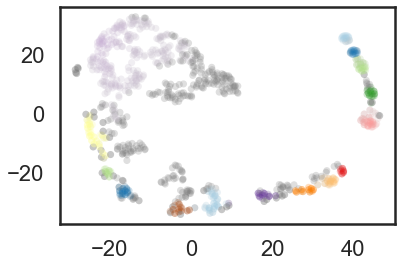

In [48]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(req_cols)
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

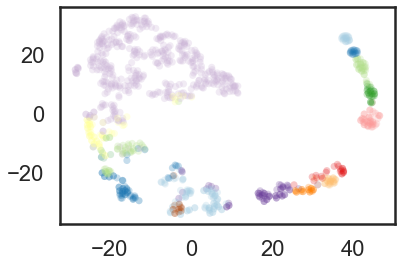

In [50]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

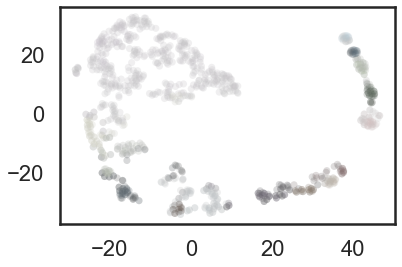

In [52]:
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [sns.desaturate(color_palette[np.argmax(x)], np.max(x))
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

In [54]:
def top_two_probs_diff(probs):
    sorted_probs = np.sort(probs)
    return sorted_probs[-1] - sorted_probs[-2]

# Compute the differences between the top two probabilities
diffs = np.array([top_two_probs_diff(x) for x in soft_clusters])
# Select out the indices that have a small difference, and a larger total probability
mixed_points = np.where((diffs < 0.001) & (np.sum(soft_clusters, axis=1) > 0.5))[0]

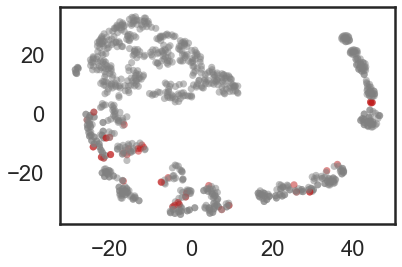

In [56]:
colors = [(0.75, 0.1, 0.1) if x in mixed_points
          else (0.5, 0.5, 0.5) for x in range(req_cols.shape[0])]
plt.scatter(*projection.T, s=50, linewidth=0, c=colors, alpha=0.5)

In [27]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [62]:
mixed_points

array([  2,   3,   4,   6,   7,   9,  11,  13,  17,  41, 127, 145, 178,
       205, 228, 231, 232, 243, 294, 338, 345, 368, 392, 517, 566, 582,
       605, 611, 625, 640, 655, 660, 669, 679, 687, 689, 690, 764, 767,
       793, 825, 827, 908, 911, 916], dtype=int64)

In [68]:
aa = req_cols.iloc[mixed_points]

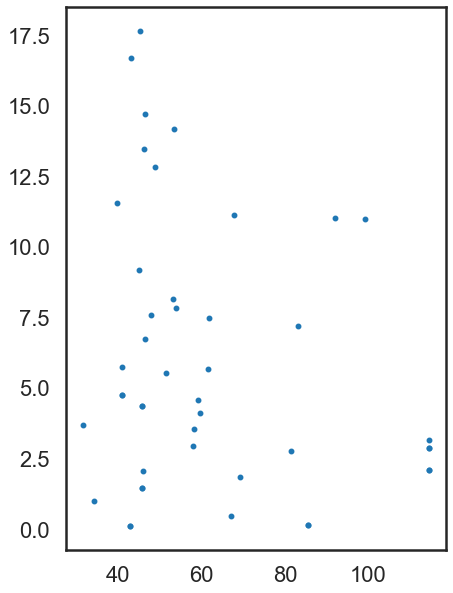

In [73]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
img = ax.scatter(aa.parking_area_m2, aa.nearest_geometry_dis, s=15,)

In [34]:
req_cols

parking_area_m2  nearest_geometry_dis
0          30.161748             26.571713
1          27.762756              9.544300
2          45.705855              1.451844
3          45.705855              1.451844
4          92.096478             11.022388
..               ...                   ...
962       110.107274              2.776756
963        55.962169              1.810653
964        55.962169              1.810653
965        20.812745              7.632571
966       109.203396             10.927497

[967 rows x 2 columns]